<a href="https://colab.research.google.com/github/satanix0/data-science/blob/main/Regression%20/Logistic%20Regression/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('train.csv')
#shape of dataset
print("shape of dataframe is : ", data.shape)
# summary of data
data.info()
#Get Statistical details of data
data.describe().T

data.isnull().sum()

shape of dataframe is :  (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [3]:
data.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
52998,16747,Operations,region_7,Master's & above,f,other,1,32,5.0,2,1,0,59,0
3870,69253,Operations,region_19,Bachelor's,m,sourcing,1,33,3.0,4,1,0,56,0
44631,4897,Operations,region_2,Bachelor's,m,sourcing,1,33,4.0,9,1,0,59,0
4509,42144,Sales & Marketing,region_7,Bachelor's,m,sourcing,1,43,5.0,10,1,0,49,0
34503,72374,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,30,4.0,6,0,0,48,0
52903,22855,Operations,region_32,Bachelor's,f,other,1,35,4.0,9,1,0,59,0
19222,29405,Sales & Marketing,region_22,Master's & above,m,other,1,48,3.0,18,0,0,52,0
51937,62958,Procurement,region_31,Bachelor's,m,other,1,39,5.0,11,1,1,90,1
53586,55013,Technology,region_5,Bachelor's,f,other,2,37,3.0,10,0,0,83,0
18515,11162,Sales & Marketing,region_7,NaN,m,other,2,26,3.0,3,0,0,47,0


In [4]:
# Drop E_id as its of no use
data.drop(columns=['employee_id'],inplace=True)

print(data.nunique())
to_removed = [i for i,j in data.nunique().to_dict().items() if j == 1 ]
to_removed
# Nothing gets removed as no column have only one single unique value

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64


[]

In [5]:
# Checking Percentage of Null values in each column
data.isnull().mean()*100
# education and previous_year_rating has 4.3% and 7.5% missing values respectively

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [6]:
# Changing the missing values with 0 and changing the dtyoe as int
data['previous_year_rating'] = data['previous_year_rating'].fillna(value = 0)
data.education.fillna("Bachelor's", inplace =True)
data.isnull().mean()*100
# No Null values upon Imputation

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

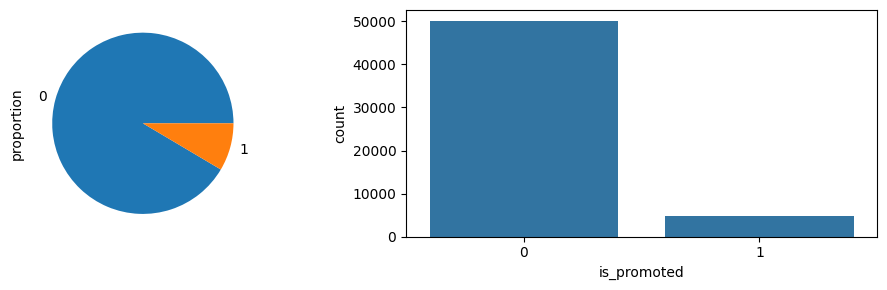

In [7]:
# chart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"],)
plt.tight_layout()
plt.show()

# there is a class imbalance because class 0 has more data points or observations than class 1

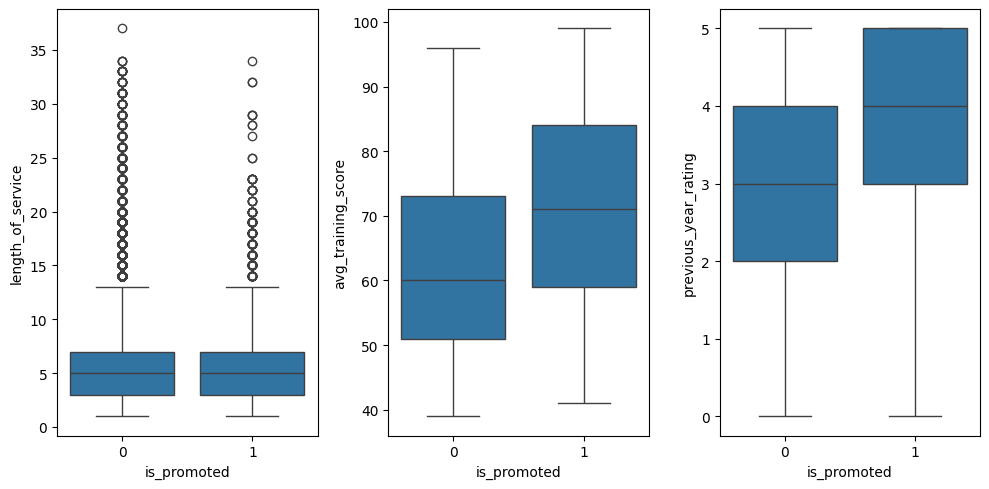

In [8]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["previous_year_rating"])
plt.tight_layout()
plt.show()

# For an employee If the avg_training_score value is higher then the chances of getting promoted are more.

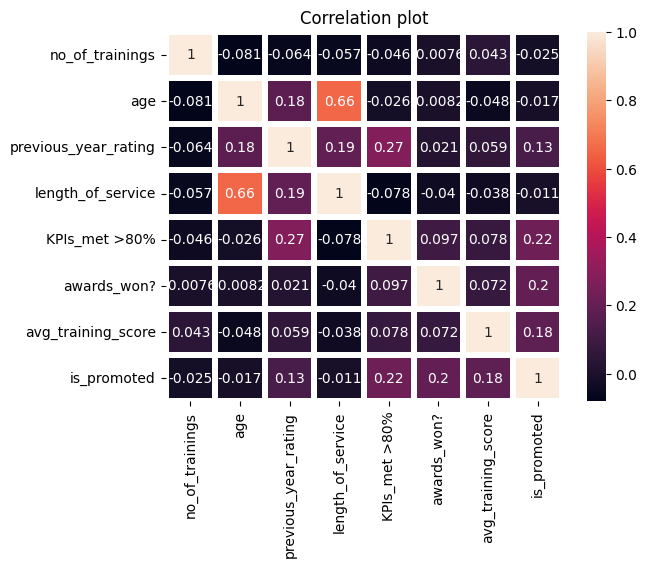

In [9]:
#correlation between features
corr_plot = sns.heatmap(data.corr(numeric_only=True), annot = True, linewidths=3)
plt.title("Correlation plot")
plt.show()

# None of the features is highly correlated with each other except age and length of the service.

In [10]:
# One-Hot Encoding to convert categories into Numeric
data['gender'] = data['gender'].map({'m':1,'f':0})
data.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,1,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,0,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,1,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,1,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,1,sourcing,1,32,5.0,5,1,0,54,0


In [11]:
cols = data.select_dtypes(["object"]).columns
data[cols].nunique().sum() 
# Total 49 unique categories accross all 4 object columns, and for each ctegory there has to be a new columns

49

### Now we can convert these categories either with pandas or Scikit-learn

#### 1. using pandas get_dummies()

In [12]:
# #Create dummy variables
# ds=pd.get_dummies(data[cols],drop_first=True)
# ds
# #concat newly created columns with original dataframe
# data=pd.concat([data,ds],axis=1)
# #Drop original columns
# data.drop(cols,axis=1,inplace=True)


#### 2. using Scikit-learn's OneHotEncoder

In [13]:
# creating instance of one-hot-encoder to covert categories in numeric
# drop='first' will remove 1st category from each out of 4 object features, 
# so finally we will be left with 49-4=45 new columns

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
# passing categorical columns to the Encoder and converting resulting columns, for each unique category, to the df
enc_df = pd.DataFrame(enc.fit_transform(data[['department', 'region', 'education', 'recruitment_channel']]).astype('int').toarray())
enc_df.columns= enc.get_feature_names_out().tolist()
# merge these new columns with original data
data = data.join(enc_df)
# Droping original columns as we now have individual columns for each unique category
data.drop(cols,axis=1,inplace=True)

In [14]:
len(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  int64  
 9   department_Finance            54808 non-null  int32  
 10  department_HR                 54808 non-null  int32  
 11  department_Legal              54808 non-null  int32  
 12  department_Operations         54808 non-null  int32  
 13  d

### Train-Test Split

In [15]:
from sklearn.model_selection import *
y=data['is_promoted']
X=data.drop(columns=['is_promoted'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 53)
(10962, 53)
(43846,)
(10962,)


### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Class Imbalance

Case when No. of different target labels vary significantly. 

We can observe that the majority of the labels are from class 0 and only a few are from class 1.

**If we use this distribution to develop our model, it may become biased towards predicting the majority class since there will be insufficient data to learn minority class patterns. The model will start predicting every new observation as 0 or majority class. (In our problem employee is not promoted). We’ll get more model accuracy here, but it won’t be a decent model because it won’t predict class 1 or minority class, which is a crucial class.**

In [17]:
y_train.value_counts(normalize=True)*100

is_promoted
0    91.424531
1     8.575469
Name: proportion, dtype: float64

**To deal with class Imbalance Logistic regression implementation that supports class weighting. We will use the inbuilt parameter *“class_weight”* while creating an instance of the Logistic Regression model.**

In [18]:
from sklearn.linear_model import LogisticRegression

# make instance of model with default parameters except class weight
# as we will add class weights due to class imbalance problem
clf = LogisticRegression(class_weight={0:0.1, 1:0.9})
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

### Model Evaluation Metrics

f1 score is the go-to metric when we have a class imbalance problem

In [19]:
from sklearn.metrics import classification_report,f1_score

print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

# we can observe that f1-score is pretty low, adn model is performing very poorly

0.384635761589404
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     10054
           1       0.25      0.80      0.38       908

    accuracy                           0.79     10962
   macro avg       0.62      0.79      0.63     10962
weighted avg       0.92      0.79      0.83     10962



### Hyperparameter Optimization

Hyperparameters of this model has to be optimised to get a more accurate model and correct predictions

In [ ]:
# define model/create instance
clf=LogisticRegression()
# tuning weight for minority class then weight for majority class will be 1-weight of minority class
# Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1, 10, 15, 20], 'penalty': ['l1', 'l2'],"class_weight":[{0: x, 1: 1.0 - x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= clf, param_grid=param, scoring="f1", cv=folds, return_train_score=True,n_jobs=8)
#train model to learn relationships between x and y
model.fit(X_train,y_train) 

In [ ]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)